In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

In [46]:
df = pd.read_csv("Online Retail.csv")

In [47]:
top_10_countries = df.groupby('Country')['Totalsale'].sum()

In [48]:
df.shape

(541909, 10)

In [49]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


#### Check for duplicate Value

In [50]:
def missing_data(input_data):
    '''
    This function returns dataframe with information about the percentage of nulls in each column and the column data type.

    input: pandas df
    output: pandas df
    
    '''
    
    total = input_data.isnull().sum()
    percent = round((input_data.isnull().sum() / input_data.isnull().count()) * 100, 2)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns: 
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types
    print("Number of duplicates: {}".format(input_data.duplicated().sum()))
    print('\n')
    return(print(pd.DataFrame(table)))


In [51]:
missing_data(df)

Number of duplicates: 5268


              Total  Percent    Types
InvoiceNo         0     0.00   object
InvoiceDate       0     0.00   object
InvoiceTime       0     0.00   object
StockCode         0     0.00   object
Description    1454     0.27   object
Quantity          0     0.00    int64
UnitPrice         0     0.00  float64
Totalsale         0     0.00  float64
CustomerID   135080    24.93  float64
Country           0     0.00   object


In [63]:
missing_val = df[df.isnull().any(axis=1)]
missing_val.head(5)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
622,536414,01-12-2010,11:52:00 AM,22139,NaN,56,0.00,0.00,NaN,United Kingdom
1443,536544,01-12-2010,02:32:00 PM,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,2.51,NaN,United Kingdom
1444,536544,01-12-2010,02:32:00 PM,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,5.02,NaN,United Kingdom
1445,536544,01-12-2010,02:32:00 PM,21786,POLKADOT RAIN HAT,4,0.85,3.40,NaN,United Kingdom
1446,536544,01-12-2010,02:32:00 PM,21787,RAIN PONCHO RETROSPOT,2,1.66,3.32,NaN,United Kingdom


So, We  can see that for Missing Value in 'CustomerId & 'Description', the Other features have value. So we are not eliminating the missing value.

In [65]:
negative_quantity = df[df['Quantity'] <= 0]
negative_quantity.head(5)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
141,C536379,01-12-2010,09:41:00 AM,D,Discount,-1,27.50,-27.50,14527.0,United Kingdom
154,C536383,01-12-2010,09:49:00 AM,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,15311.0,United Kingdom
235,C536391,01-12-2010,10:24:00 AM,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,17548.0,United Kingdom
236,C536391,01-12-2010,10:24:00 AM,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,17548.0,United Kingdom
237,C536391,01-12-2010,10:24:00 AM,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,17548.0,United Kingdom


"Quantity" & "Totalsale" Can not be negative. IT seems there is some mistakes during data entry.
### so we converting Negative value into Positive

In [66]:
df['Quantity'] = df['Quantity'].abs()
df['Totalsale'] = df['Totalsale'].abs()

In [27]:
print("Number of Unique Customer ID:",df.CustomerID.nunique())
print('\n')
print(df.Country.value_counts().head(5))

Number of Unique Customer ID: 4372


United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64


## 1.Sales Analysis:

#### What is the total sales volume over time?
#### What is the total revenue generated over time?

In [69]:
Total_Sales_Amount = df['Totalsale'].sum()
Total_Sales_Volume = df['Quantity'].sum()
print("Total Sales amount :", round(Total_Sales_Amount,2))
print("Total Sales Volume :", round(Total_Sales_Volume,2))

Total Sales amount : 11585621.15
Total Sales Volume : 6145512


In [70]:
print("Number of Unique Items {}".format(df.StockCode.nunique()))

Number of Unique Items 4070


### Top Ten Selling Items by Number & Top Ten Selling Items by Sales Amount

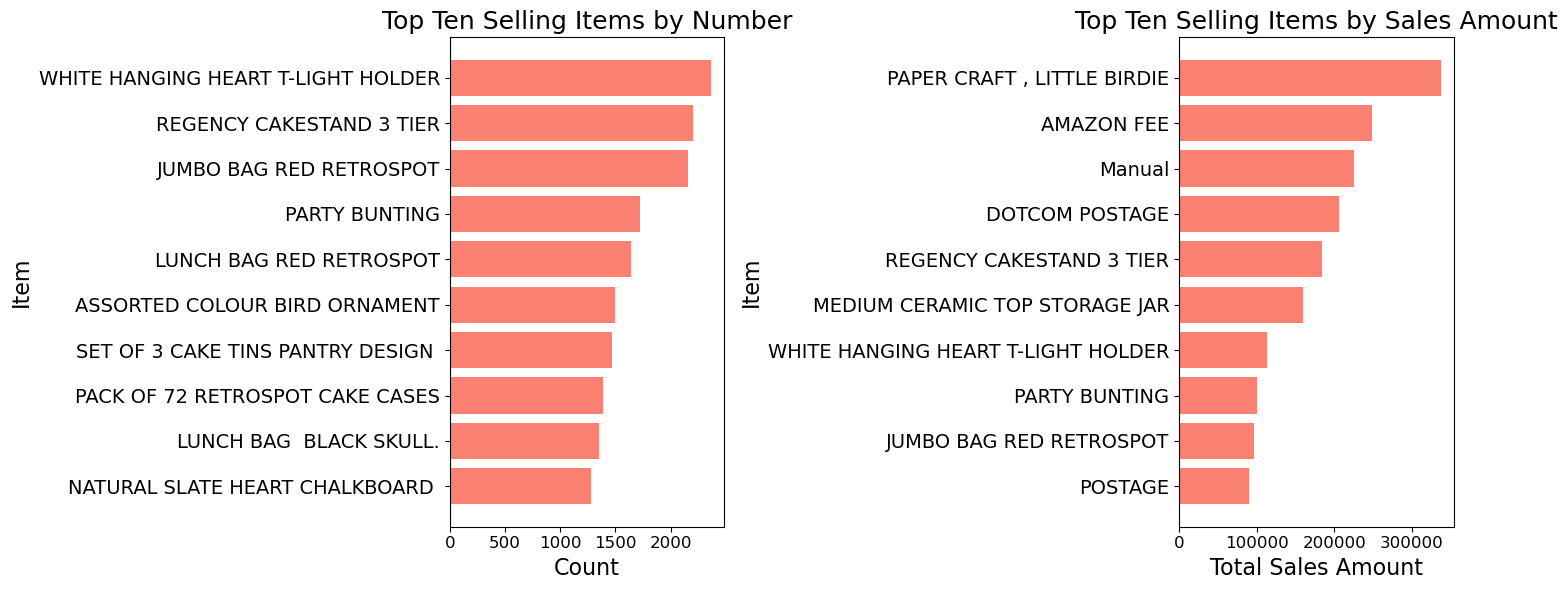

In [87]:
# Top Ten Selling Items by Number
top_ten_items = df['Description'].value_counts().head(10)
top_ten_items_df = pd.DataFrame({'Item': top_ten_items.index, 'Count': top_ten_items.values})

# Top Ten Selling Items by Sales Amount
item_sales = df.groupby('Description')['Totalsale'].sum()
top_ten_sales_items = item_sales.nlargest(10)
top_ten_sales_items_df = pd.DataFrame({'Item': top_ten_sales_items.index, 'TotalSales': top_ten_sales_items.values})

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot Top Ten Selling Items by Number
axs[0].barh(top_ten_items_df['Item'], top_ten_items_df['Count'], color='salmon')
axs[0].set_xlabel('Count', fontsize=16)
axs[0].set_ylabel('Item', fontsize=16)
axs[0].set_title('Top Ten Selling Items by Number', fontsize=18)
axs[0].invert_yaxis()  # Invert y-axis to display the highest count at the top
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=14)

# Plot Top Ten Selling Items by Sales Amount
axs[1].barh(top_ten_sales_items_df['Item'], top_ten_sales_items_df['TotalSales'], color='salmon')
axs[1].set_xlabel('Total Sales Amount', fontsize=16)
axs[1].set_ylabel('Item', fontsize=16)
axs[1].set_title('Top Ten Selling Items by Sales Amount', fontsize=18)
axs[1].invert_yaxis()  # Invert y-axis to display the highest sales amount at the top
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


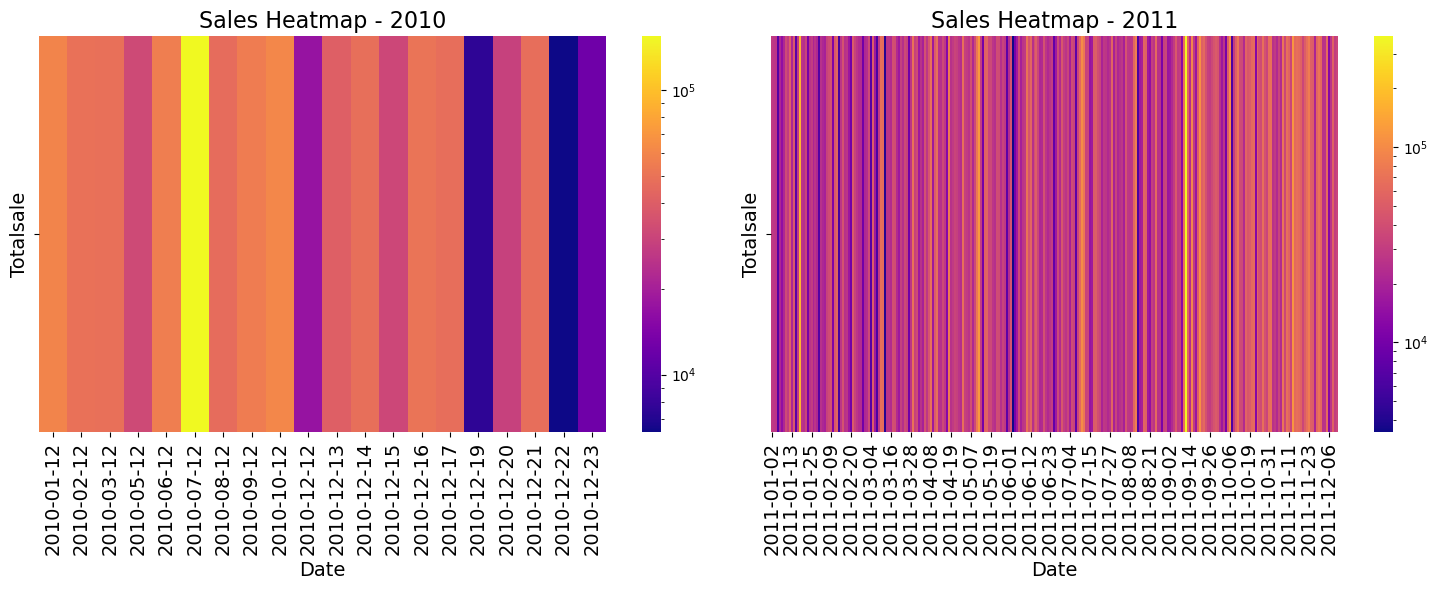

In [85]:
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm for log scale

# Filter data for 2010 and 2011
df_2010 = df[df['InvoiceDate'].dt.year == 2010]
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Aggregate Total Sales by Date for each year
total_revenue_2010 = df_2010.groupby(df_2010['InvoiceDate'].dt.date)['Totalsale'].sum()
total_revenue_2011 = df_2011.groupby(df_2011['InvoiceDate'].dt.date)['Totalsale'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot heatmap for 2010
sns.heatmap(total_revenue_2010.to_frame().T, cmap='plasma', norm=LogNorm(), ax=axes[0])
axes[0].set_title('Sales Heatmap - 2010', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
#axes[0].set_ylabel('Year', fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# Plot heatmap for 2011
sns.heatmap(total_revenue_2011.to_frame().T, cmap='plasma', norm=LogNorm(), ax=axes[1])
axes[1].set_title('Sales Heatmap - 2011', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
#axes[1].set_ylabel('Year', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


In [47]:
total_revenue_over_time.head(10)

InvoiceDate
2010-01-12    58635.56
2010-02-12    46207.28
2010-03-12    45620.46
2010-05-12    31383.95
2010-06-12    53860.18
2010-07-12    45059.05
2010-08-12    44189.84
2010-09-12    52532.13
2010-10-12    57404.91
2010-12-12    17240.92
Name: TotalSale, dtype: float64

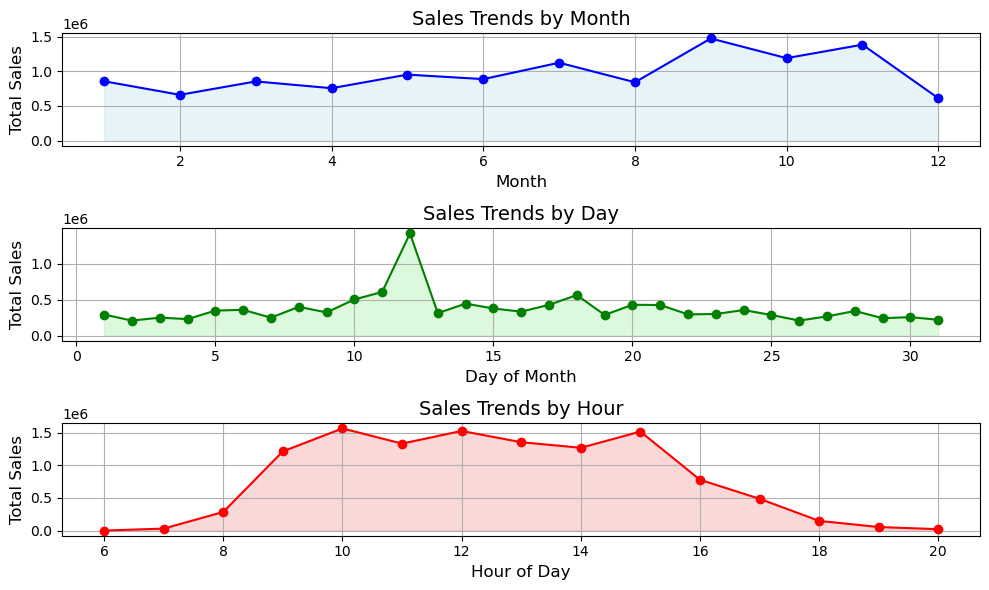

In [95]:
# Plot sales trends
plt.figure(figsize=(10, 6))

# Sales Trends by Month
plt.subplot(3, 1, 1)
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', linestyle='-', color='blue')
plt.fill_between(sales_by_month.index, sales_by_month.values, color='lightblue', alpha=0.3)  # Fill area under the line
plt.title('Sales Trends by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)

# Sales Trends by Day
plt.subplot(3, 1, 2)
plt.plot(sales_by_day.index, sales_by_day.values, marker='o', linestyle='-', color='green')
plt.fill_between(sales_by_day.index, sales_by_day.values, color='lightgreen', alpha=0.3)  # Fill area under the line
plt.title('Sales Trends by Day', fontsize=14)
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)

# Sales Trends by Hour
plt.subplot(3, 1, 3)
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o', linestyle='-', color='red')
plt.fill_between(sales_by_hour.index, sales_by_hour.values, color='lightcoral', alpha=0.3)  # Fill area under the line
plt.title('Sales Trends by Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


### How do sales vary between different product categories in different prize range?

In [104]:
df_new = df.copy()
# Remove rows where unit price is 0 or lower
df_new = df_new[df_new['UnitPrice'] > 0]

In [105]:
# Assign categories
df_new['PriceCategory'] = pd.qcut(df_new['UnitPrice'], q=3, labels=['Low', 'Medium', 'High'])

In [106]:
Sale_by_PriceCategory = df_new.groupby('PriceCategory')['Totalsale'].sum()
Count_by_PriceCategory = df_new.groupby('PriceCategory')['Quantity'].sum()

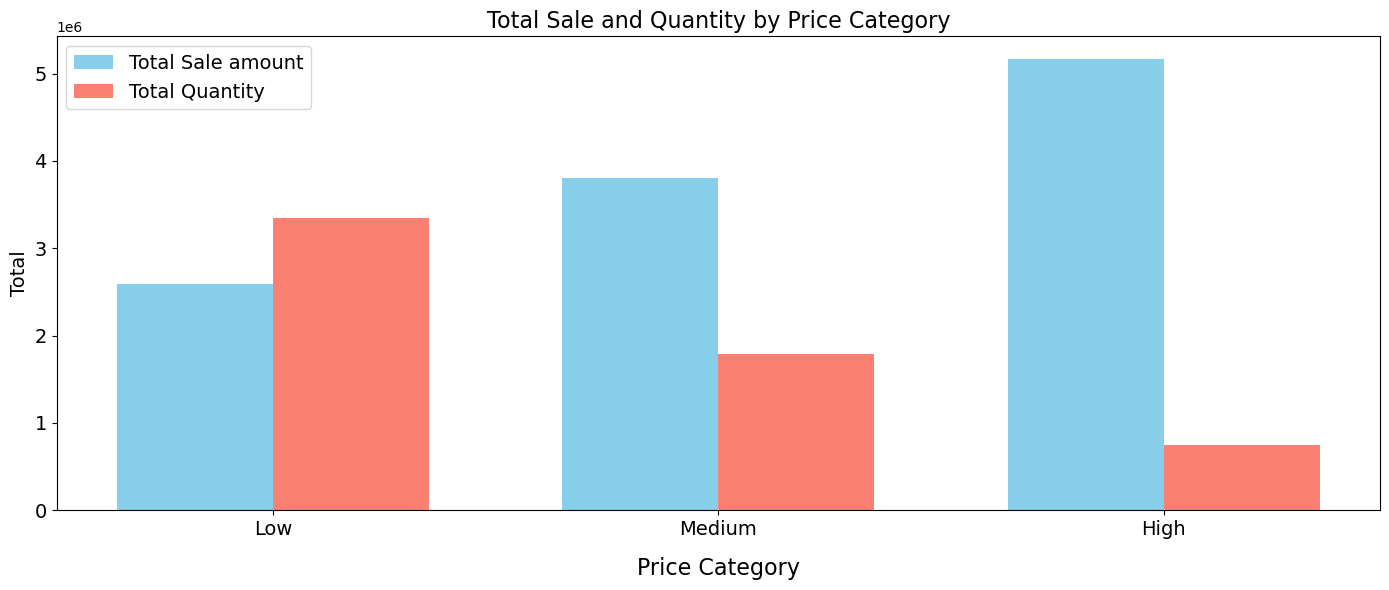

In [118]:
import numpy as np

# Creating a figure
fig, ax = plt.subplots(figsize=(14, 6))

# Define the width of each bar
bar_width = 0.35

# Define the index for the bars
index = np.arange(len(Sale_by_PriceCategory.index))

# Plotting total sale by price category
color1 = 'skyblue'
ax.bar(index - bar_width/2, Sale_by_PriceCategory.values, bar_width, color=color1, label='Total Sale amount')

# Plotting total quantity by price category
color2 = 'salmon'
ax.bar(index + bar_width/2, Count_by_PriceCategory.values, bar_width, color=color2, label='Total Quantity')

# Set the title, labels, and tick sizes
ax.set_title('Total Sale and Quantity by Price Category', fontsize=16)
ax.set_xlabel('Price Category', fontsize=16, labelpad=13)
ax.set_ylabel('Total', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(Sale_by_PriceCategory.index, fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Adding legend
ax.legend(loc='upper left', fontsize=14)

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()





## 2.Customer Analysis:


### How many unique customers are there?

In [123]:
num_unique_customers = df['CustomerID'].nunique()
print("Number of unique customers:", num_unique_customers)

Number of unique customers: 4372


### What is the distribution of customers by country?

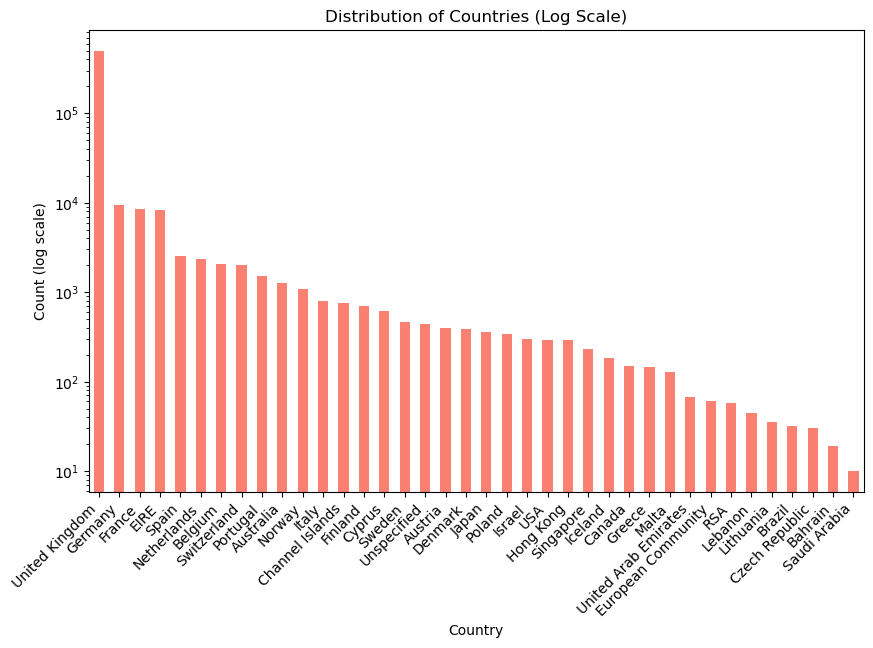

In [21]:
plt.figure(figsize=(10, 6))
df['Country'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Country')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Countries (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()


### What is the average transaction size per customer?

In [125]:
average_transaction_size = df.groupby('CustomerID')['Totalsale'].mean().mean()
average_transaction_size_formatted = "{:.2f}".format(average_transaction_size)
print("Average transaction size per customer:", average_transaction_size_formatted)


Average transaction size per customer: 28.84


### Who are the top-spending customers?

In [123]:
# Grouping by 'CustomerID' and 'Country' and summing total sales
top_spending_customers = df.groupby(['CustomerID', 'Country'])['Totalsale'].sum().sort_values(ascending=False).head(10)

# Converting the result to a DataFrame for better visualization
top_spending_customers_df = top_spending_customers.reset_index()

table_data = top_spending_customers_df.values.tolist()

# Define the headers for the table
headers = ["CustomerID", "Country", "TotalSale"]

# Print the table using the tabulate function
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+------------+----------------+-----------+
| CustomerID |    Country     | TotalSale |
+------------+----------------+-----------+
|  16446.0   | United Kingdom | 336942.1  |
|  14646.0   |  Netherlands   | 280923.02 |
|  18102.0   | United Kingdom | 262876.11 |
|  17450.0   | United Kingdom | 201619.41 |
|  14911.0   |      EIRE      | 155077.5  |
|  12346.0   | United Kingdom | 154367.2  |
|  12415.0   |   Australia    | 126103.61 |
|  14156.0   |      EIRE      | 121375.12 |
|  16029.0   | United Kingdom | 111057.07 |
|  17511.0   | United Kingdom | 93999.38  |
+------------+----------------+-----------+


### How frequently do customers make purchases?

In [124]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group the data by 'CustomerID' and calculate the difference in days between consecutive purchases
purchase_frequency = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.diff().mean().days)

# Display the average purchase frequency
print("Average purchase frequency (in days): {:.2f}".format(purchase_frequency.mean()))


Average purchase frequency (in days): 2.50


## 3. Order Analysis:

### What is the average order quantity?

In [125]:
# Calculate the average order quantity
average_order_quantity = df['Quantity'].mean()
print("Average order quantity: {:.2f}".format(average_order_quantity))

Average order quantity: 11.34


### What is the average order value?

In [126]:
# Calculate the average order value
average_order_value = df_new['Totalsale'].mean()
print("Average order value: {:.2f}".format(average_order_value))


Average order value: 21.44


### How many orders are placed per day or per month?

In [128]:
# Convert 'InvoiceDate' column to datetime format if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by 'InvoiceDate' and count the number of unique orders
Average_orders_per_day = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique().mean()

# Print the result
print("Average Number of orders per day: {:.2f}".format(Average_orders_per_day))


Average Number of orders per day: 84.92


In [129]:
# Group by 'Month' and count the number of unique orders
orders_per_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique().mean()

# Print the result
print("Average Number of orders per month: {:.2f}".format(orders_per_month))


Average Number of orders per month: 2158.33


### What is the distribution of order sizes?

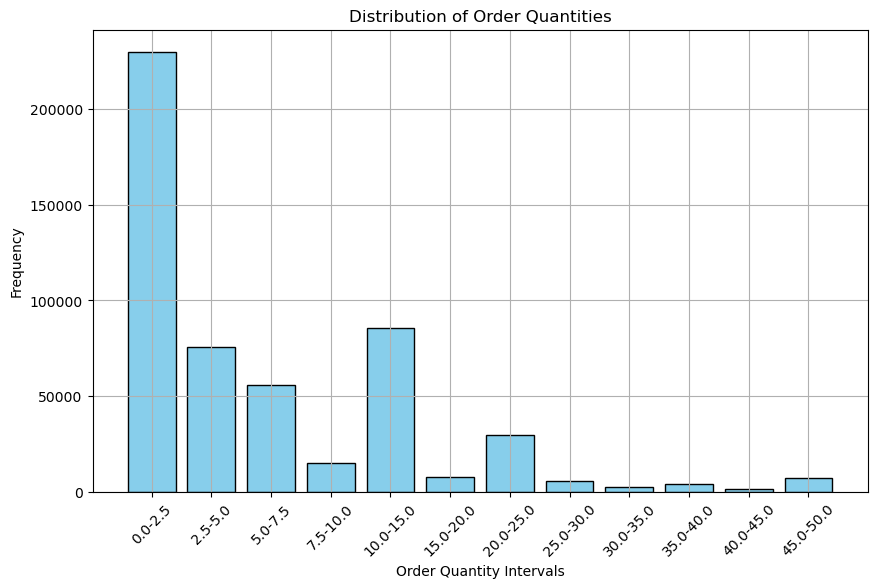

In [149]:
# Calculate the frequency of order quantities in each bin
quantity_counts, bin_edges = np.histogram(df['Quantity'], bins=bin_edges)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(bin_edges) - 1), quantity_counts, color='skyblue', edgecolor='black')
plt.xlabel('Order Quantity Intervals')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i+1]}' for i in range(len(bin_edges) - 1)], rotation=45)
plt.grid(True)
plt.show()


### How does sales volume vary over day of the week?

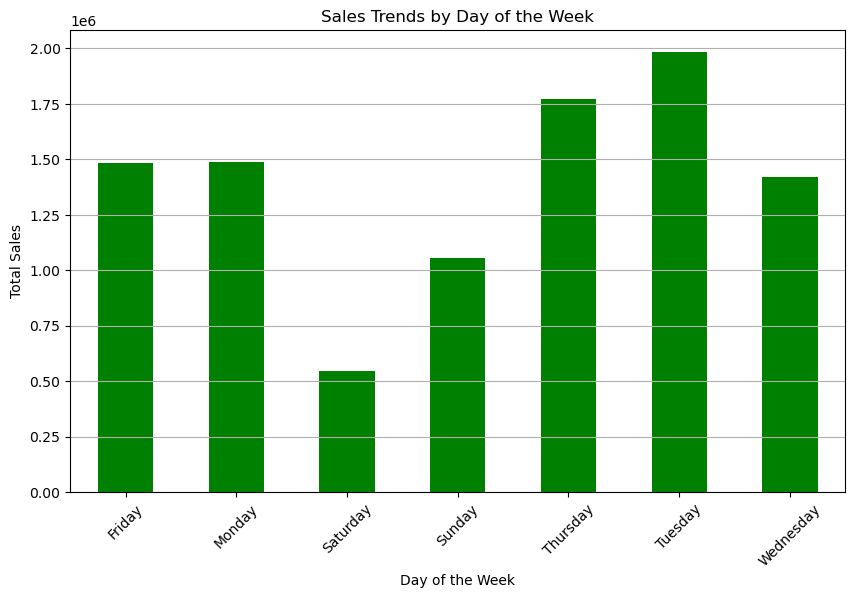

In [157]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Extracting day of the week from the 'InvoiceDate' column
df['Day_of_Week'] = df['InvoiceDate'].dt.dayofweek

# Mapping day of the week to their respective names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_of_Week'] = df['Day_of_Week'].map(day_names)

# Calculating total sales by day of the week
sales_by_day_of_week = df.groupby('Day_of_Week')['Totalsale'].sum()

# Plotting sales trends by day of the week
plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Day of the Week')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


### How does sales volume vary over weekdays and weekends?

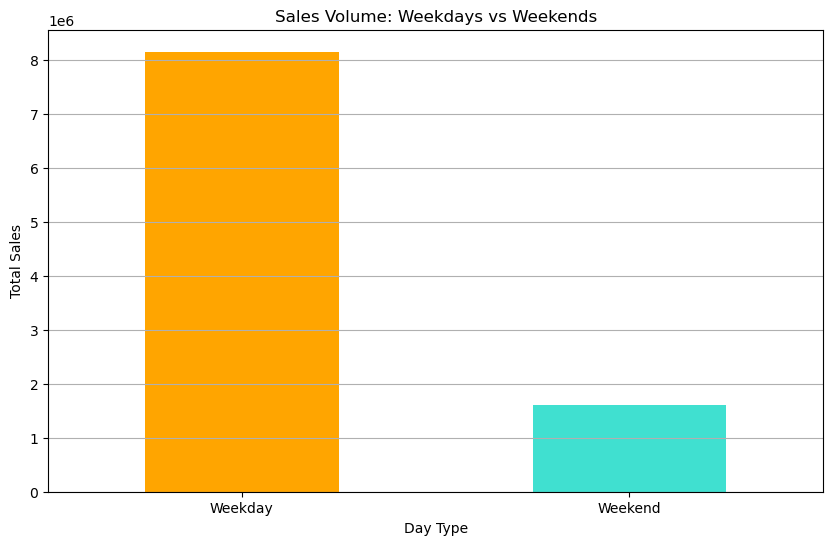

In [164]:
# Extracting day of the week from the 'InvoiceDate' column (Monday=0, Sunday=6)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Define a function to classify days as weekdays or weekends
def classify_day(day):
    if day < 5:
        return 'Weekday'
    else:
        return 'Weekend'

# Apply the function to create a new column 'DayType'
df['DayType'] = df['DayOfWeek'].apply(classify_day)

# Group the data by 'DayType' and calculate total sales volume
sales_by_daytype = df.groupby('DayType')['Totalsale'].sum()

# Plot the sales trends for weekdays and weekends
plt.figure(figsize=(10, 6))
sales_by_daytype.plot(kind='bar', color=['Orange', 'Turquoise'])
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.title('Sales Volume: Weekdays vs Weekends')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### differences in purchasing behavior between countries

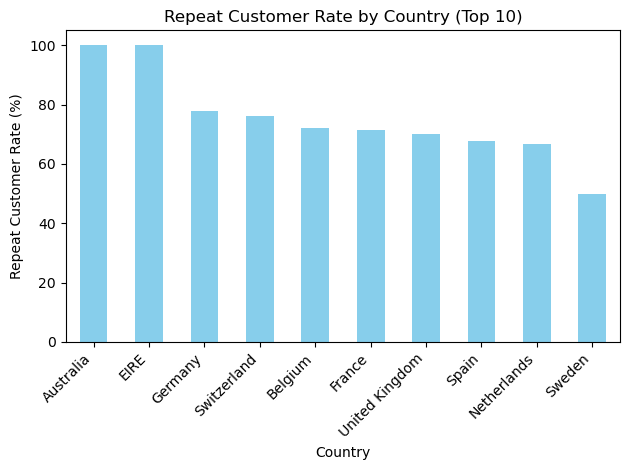

In [130]:
#Filter the dataset for the top 10 countries by total sale
top_10_countries = df.groupby('Country')['Totalsale'].sum().nlargest(10).index
df_top_10 = df[df['Country'].isin(top_10_countries)]

# Identify repeat customers within each country
repeat_customers = df_top_10.groupby(['Country', 'CustomerID'])['InvoiceNo'].nunique() > 1
repeat_customers = repeat_customers.groupby('Country').sum()

# Calculate the repeat customer rate for each country
total_customers = df_top_10.groupby('Country')['CustomerID'].nunique()
repeat_customer_rate = ((repeat_customers / total_customers) * 100).sort_values(ascending=False)

# Step 4: Visualize the repeat customer rate
repeat_customer_rate.plot(kind='bar', color='skyblue')
plt.title('Repeat Customer Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Repeat Customer Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


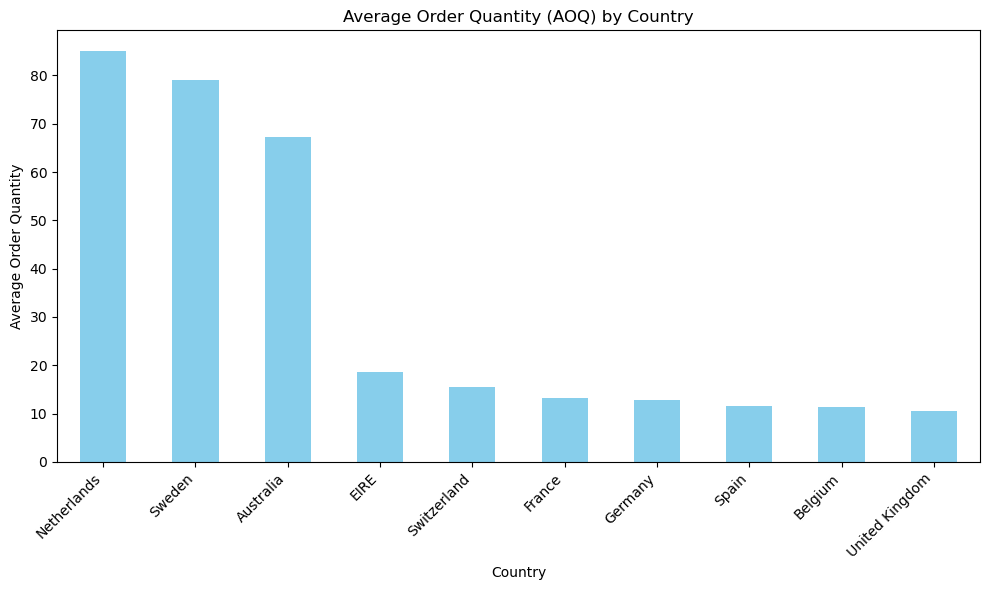

In [131]:
# Grouping the DataFrame by country and calculating the average order quantity
avg_order_quantity_by_country = df_top_10.groupby('Country')['Quantity'].mean()
# Sorting the result in descending order of average order quantity
avg_order_quantity_by_country = avg_order_quantity_by_country.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
avg_order_quantity_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Order Quantity')
plt.title('Average Order Quantity (AOQ) by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
